In [2]:
# imports
import numpy as np
import sys
sys.path.insert(0,"")

import warnings
warnings.filterwarnings('ignore')

In [3]:
from gym_graphenv.envs.GraphworldManhattan import GraphEnv

In [3]:
env=GraphEnv()

USE CONFIG True
Using remote db
Read hubs successfully
DB: getAvailableTrips() Execution time: 2.546492099761963 seconds
loaded 5000 trips
Initialized with 5000 taxi rides within two weeks


In [4]:
env.reset()

Started Reset() with config
Reset initialized pickup: 2
Reset initialized dropoff: 3
Reset initialized time: 2016-01-01 12:00:00


{'cost': array([ 2032,  2817,     0,  1626,  2201,  1982,  1679,  2157,  3114,
         1645,  3121,  3331,  4366,  4357,  4592,  4747,  5073,  6524,
         6934,  6411,  6030,  5799,  6352,  6303,  9330, 10060, 10041,
        10073, 10549, 11673, 12862, 14512, 13980, 15725, 15407, 15017,
        18300, 16497, 19647, 19084, 19087, 19959, 20847, 13976, 12437,
        11686, 11527, 10501,  9599,  8318,  8298,  7101,  9781,  4377,
         3287,  1896,  2570,  2179,  3872,  4866,  3861,  6898,  7867,
         7653,  9959, 10770, 11247,  5308,  4523,  4846]),
 'remaining_distance': array([ 5486,  7232,  1626,  1626,  2776,  3491,  2930,  3796,  6010,
         4810,  6138,  7102,  8362,  8982,  9017,  9542, 10034, 13204,
        14046, 13134, 12482, 11646, 13117, 12792, 16568, 18207, 18166,
        18395, 19185, 21844, 25233, 26396, 26345, 28949, 28793, 29903,
        33520, 32269, 37155, 36028, 36030, 37774, 39581, 28082, 25228,
        23394, 23484, 21074, 19565, 17344, 17021, 14394, 13

In [7]:
trips = env.availableTrips()

In [8]:
env.step(5)

action == book own 
2 -> 5 1982.4319999999998


({'cost': array([ 2256,  3887,  1547,  1508,  1984,     0,  1228,  1632,  1838,
          1854,  1846,  2056,  2945,  3082,  3694,  3631,  3957,  5103,
          5610,  4990,  4755,  4683,  5077,  5027,  5890,  6619,  7844,
          6632,  7109,  9476, 10665, 12315, 11783, 13528, 13210, 13693,
         15725, 15173, 16015, 16887, 16890, 17762, 18650, 12652, 11113,
         10362, 10203,  9177,  8275,  6897,  6974,  5680,  7584,  3852,
          4496,  3105,  2453,  2061,  3347,  4272,  3336,  4701,  5670,
          5457,  7762,  8574,  9050,  4033,  3248,  3571]),
  'remaining_distance': array([ 5710,  8302,  3173,  1508,  2559,  1508,  2480,  3271,  4735,
          5018,  4863,  5827,  6942,  7707,  8119,  8426,  8918, 11783,
         12722, 11714, 11207, 10530, 11842, 11517, 13127, 14766, 15969,
         14954, 15745, 19647, 23036, 24199, 24149, 26752, 26596, 28579,
         30945, 30945, 33523, 33831, 33834, 35577, 37384, 26758, 23904,
         22070, 22160, 19750, 18241, 15923, 15

In [10]:
trips = env.availableTrips()
trips

[]

In [4]:
env=GraphEnv()
env.reset()
env.step(np.random.randint(70))
trips = env.availableTrips()

USE CONFIG True
Using remote db
DB: getAvailableTrips() Execution time: 0.4543647766113281 seconds
loaded 5000 trips
Initialized with 5000 taxi rides within two weeks
Started Reset() with config
Reset initialized pickup: 2
Reset initialized dropoff: 3
Reset initialized time: 2016-01-01 12:00:00
action == book own 
2 -> 30 12862.231000000002


In [23]:
import pandas as pd

def create_df_from_actions(env):
    shared_rides = list()
    shared_ids = list()

    trips = env.availableTrips()
        
    for i, trip in enumerate(trips):
        shared_ids.append(trip['target_hub'])
        
    all_hubs = env.hubs

    book_own_ids = list(set(all_hubs) - set(shared_ids))
    
    position = env.manhattan_graph.get_nodeid_by_hub_index(env.position)
    final = env.manhattan_graph.get_nodeid_by_hub_index(env.final_hub)
    start = env.manhattan_graph.get_nodeid_by_hub_index(env.start_hub)

    node_sizes = list()
    actions = []
    for n in all_hubs:
        if n == position:
            actions.append('position')
        else:
            if n == final:
                actions.append('final')
            else:
                if n == start:
                    actions.append('start')
                else:
                    if n in shared_ids:
                        actions.append('shared')
                    else:
                        if n in book_own_ids:
                            actions.append('book')                
    df = pd.read_csv("../data/hubs/new_hubs.csv")
    ids = [i for i in range(70)]
    df['id'] = ids
    df['actions']=actions

    return df
    

In [20]:
import plotly.express as px
def plot_map(df):
    px.set_mapbox_access_token(open("mapbox_token").read())
    #df = px.data.carshare()
    fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name ="id", color="actions", #size="car_hours",
                color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)  
    fig.show()

In [24]:
df = create_df_from_actions(env)
plot_map(df)

In [25]:
env.step(20)
df = create_df_from_actions(env)
plot_map(df)

action == book own 
30 -> 20 9181.997999999998


In [27]:
env.step(1)

action == wait 
1 -> 1 0.0


({'cost': array([ 1375,     0,  2510,  4414,  4989,  3846,  4025,  4503,  5016,
          2063,  4583,  5233,  6084,  7890,  7712,  8083,  8409,  7935,
          7819, 10050,  9559,  9110,  9876,  9904, 10466, 11195, 11176,
         11208, 11685, 12808, 13997, 15648, 15115, 16861, 16542, 18169,
         19435, 17382, 20783, 20220, 20222, 21094, 21983, 14862, 13323,
         12572, 12412, 11386, 10484,  9661,  9183, 10713, 10916,  7474,
          6308,  4917,  4265,  3873,  6688,  6001,  7256,  8033,  9002,
          8789, 11094, 11906, 12382,  8860,  8050,  8395]),
  'remaining_distance': array([ 4829,  4414,  4136,  4414,  5564,  5355,  5277,  6142,  7912,
          5228,  7600,  9004, 10080, 12515, 12137, 12878, 13370, 14615,
         14931, 16774, 16010, 14957, 16641, 16394, 17703, 19342, 19301,
         19530, 20320, 22979, 26369, 27532, 27481, 30084, 29928, 33054,
         34655, 33155, 38291, 37163, 37166, 38909, 40716, 28967, 26113,
         24280, 24370, 21960, 20450, 18687, 17

In [59]:
env.step(69)

action == wait 
69 -> 69 0.0


({'cost': array([ 5933,  8797,  4900,  5107,  3826,  3676,  3607,  3133,  2176,
          5321,  2678,  1783,  2966,   789,    68,    31,   798,  1767,
          2042,  1654,  1188,  1672,  1506,  1716,  2878,  3298,  4467,
          3621,  3962,  6543,  7732,  9382,  6917, 10595, 10277, 10483,
         13170, 11962, 12805, 13954, 13957, 14829, 15717,  9442,  7903,
          7152,  6992,  4623,  5064,  3480,  3293,  2345,  4651,    92,
           700,   561,   495,  4566,   168,  6778,   225,  1768,  2737,
          2523,  4829,  5640,  6117,   465,   618,     0]),
  'remaining_distance': array([ 9387, 13212,  6527,  5107,  4401,  5185,  4859,  4772,  5072,
          8486,  5695,  5554,  6962,  5414,  5107,  5107,  5759,  8447,
          9154,  8378,  7639,  7519,  8271,  8205, 10116, 11445, 12591,
         11943, 12598, 16714, 20103, 21266, 19283, 23819, 23663, 25368,
         28390, 27735, 30313, 30898, 30901, 32644, 34451, 23547, 20693,
         18860, 18950, 15196, 15030, 12506, 12

action == wait 
15 -> 15 0.0


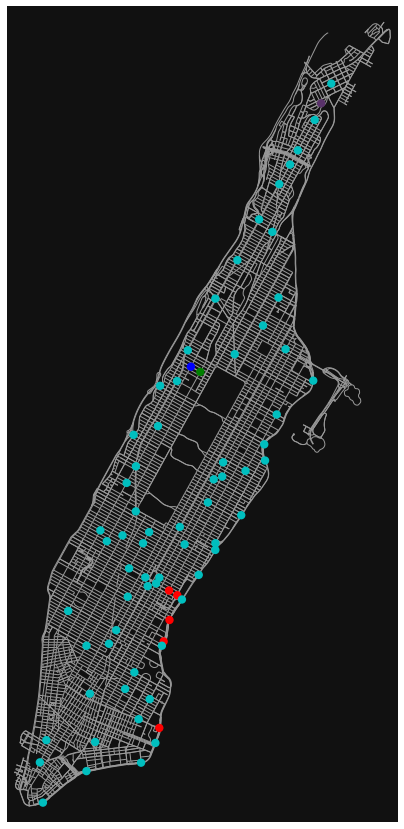

Legend HUBS:
RED - SHARED
TURQUISE - BOOK OWN
LILA - CURRENT
GREEN - START
BLUE - FINAL
0
action == wait 
15 -> 15 0.0


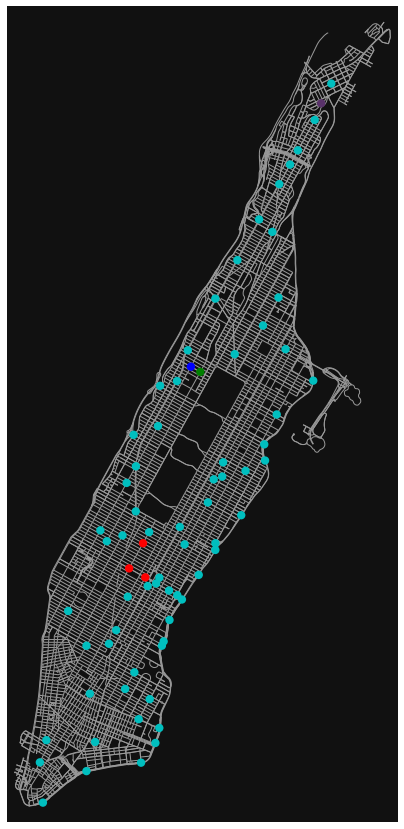

Legend HUBS:
RED - SHARED
TURQUISE - BOOK OWN
LILA - CURRENT
GREEN - START
BLUE - FINAL
1
action == wait 
15 -> 15 0.0


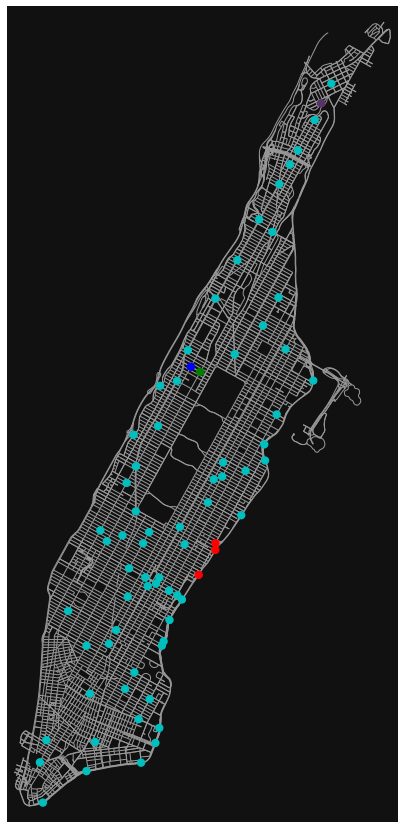

Legend HUBS:
RED - SHARED
TURQUISE - BOOK OWN
LILA - CURRENT
GREEN - START
BLUE - FINAL
2
action == wait 
15 -> 15 0.0


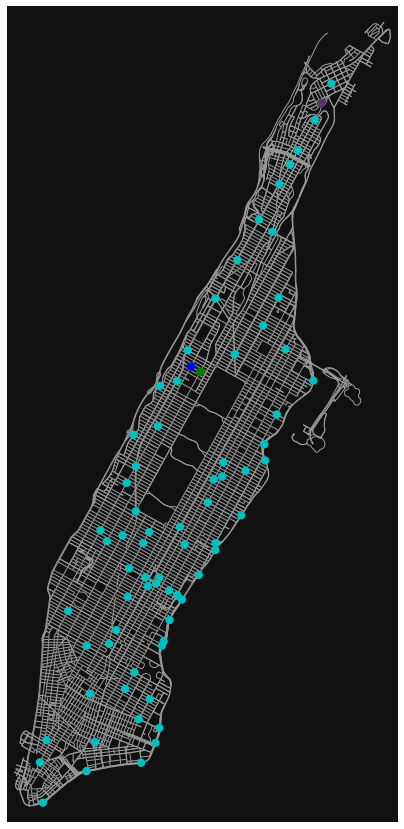

Legend HUBS:
RED - SHARED
TURQUISE - BOOK OWN
LILA - CURRENT
GREEN - START
BLUE - FINAL
3
action == wait 
15 -> 15 0.0


KeyboardInterrupt: 

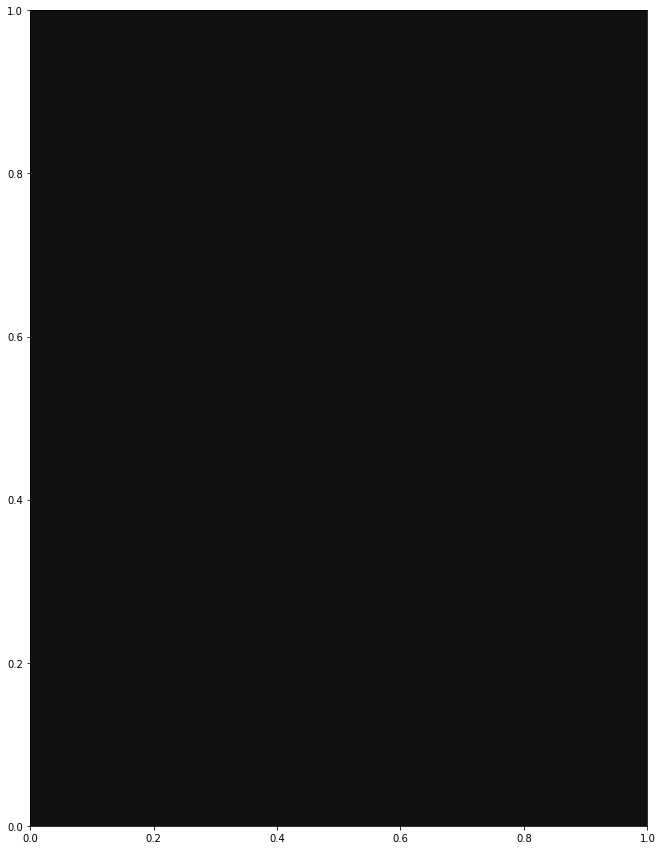

In [7]:
for i in range(5):
    env.step(15)
    env.render()
    print(i)

Started Reset() with config
Reset initialized pickup: 2
Reset initialized dropoff: 3
Reset initialized time: 2016-01-01 12:00:00
reset done
Shared:  []
Book owns:  [42447105, 42437644, 595295501, 42428174, 42443534, 371188750, 371239958, 561042199, 42447132, 42433058, 42450468, 42440743, 1825841704, 42433066, 42445867, 42445357, 42430253, 42428980, 42457401, 42427968, 595352904, 42445392, 42432856, 42445916, 42440798, 561035358, 42435684, 5779545445, 42450025, 42446959, 42427769, 42432889, 42430333, 42446977, 42450820, 42449029, 42436486, 42433422, 1919595922, 4145735059, 42430361, 42443674, 42438809, 7490266268, 370924957, 42429342, 370888100, 42430375, 42444457, 42453934, 42442415, 42442937, 205024444, 42428863, 595314119, 1061531596, 42427863, 42432985, 42445018, 42424025, 3579432156, 370913758, 42423774, 3099327970, 9177424868, 248708582, 3099327976, 42442475, 596775930, 1692433919]


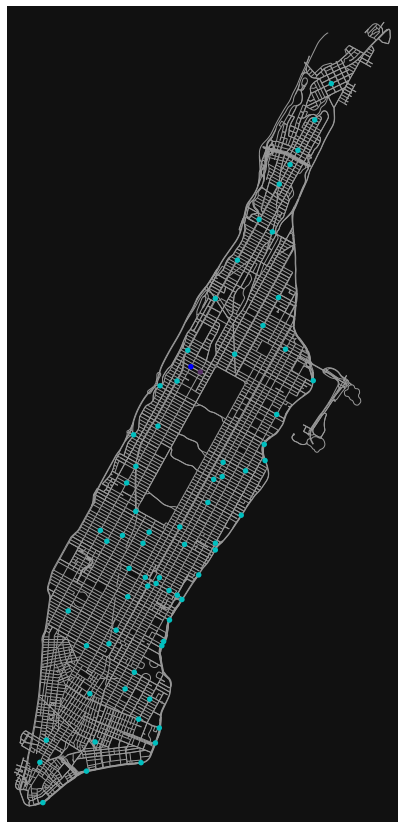

HIER IST RENDER FERTIG
50
Alle: [2]
2
Our destination hub is: 2
action == wait 
2 -> 2 0.0
sum_reward:  0.0
Shared:  []
Book owns:  [42447105, 42437644, 595295501, 42428174, 42443534, 371188750, 371239958, 561042199, 42447132, 42433058, 42450468, 42440743, 1825841704, 42433066, 42445867, 42445357, 42430253, 42428980, 42457401, 42427968, 595352904, 42445392, 42432856, 42445916, 42440798, 561035358, 42435684, 5779545445, 42450025, 42446959, 42427769, 42432889, 42430333, 42446977, 42450820, 42449029, 42436486, 42433422, 1919595922, 4145735059, 42430361, 42443674, 42438809, 7490266268, 370924957, 42429342, 370888100, 42430375, 42444457, 42453934, 42442415, 42442937, 205024444, 42428863, 595314119, 1061531596, 42427863, 42432985, 42445018, 42424025, 3579432156, 370913758, 42423774, 3099327970, 9177424868, 248708582, 3099327976, 42442475, 596775930, 1692433919]


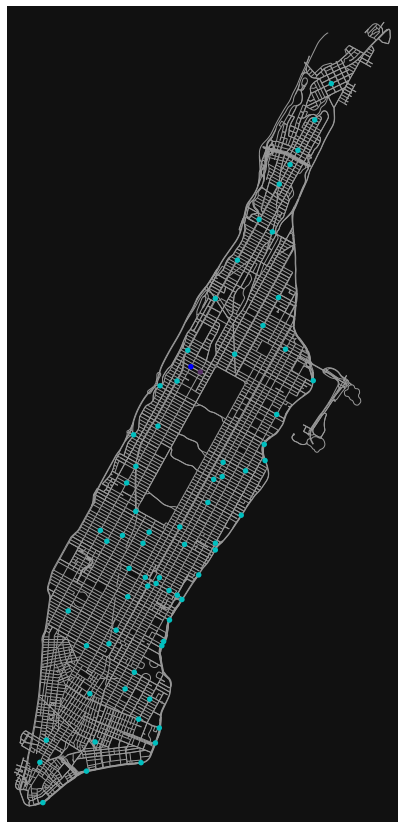

HIER IST RENDER FERTIG
50
Alle: [2]
2
Our destination hub is: 2
action == wait 
2 -> 2 0.0
sum_reward:  0.0
Shared:  []
Book owns:  [42447105, 42437644, 595295501, 42428174, 42443534, 371188750, 371239958, 561042199, 42447132, 42433058, 42450468, 42440743, 1825841704, 42433066, 42445867, 42445357, 42430253, 42428980, 42457401, 42427968, 595352904, 42445392, 42432856, 42445916, 42440798, 561035358, 42435684, 5779545445, 42450025, 42446959, 42427769, 42432889, 42430333, 42446977, 42450820, 42449029, 42436486, 42433422, 1919595922, 4145735059, 42430361, 42443674, 42438809, 7490266268, 370924957, 42429342, 370888100, 42430375, 42444457, 42453934, 42442415, 42442937, 205024444, 42428863, 595314119, 1061531596, 42427863, 42432985, 42445018, 42424025, 3579432156, 370913758, 42423774, 3099327970, 9177424868, 248708582, 3099327976, 42442475, 596775930, 1692433919]


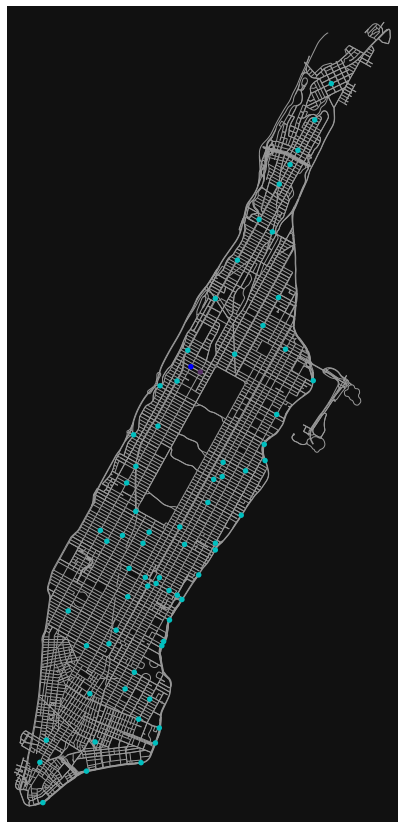

HIER IST RENDER FERTIG
50
Alle: [2]
2
Our destination hub is: 2
action == wait 
2 -> 2 0.0
sum_reward:  0.0
Shared:  []
Book owns:  [42447105, 42437644, 595295501, 42428174, 42443534, 371188750, 371239958, 561042199, 42447132, 42433058, 42450468, 42440743, 1825841704, 42433066, 42445867, 42445357, 42430253, 42428980, 42457401, 42427968, 595352904, 42445392, 42432856, 42445916, 42440798, 561035358, 42435684, 5779545445, 42450025, 42446959, 42427769, 42432889, 42430333, 42446977, 42450820, 42449029, 42436486, 42433422, 1919595922, 4145735059, 42430361, 42443674, 42438809, 7490266268, 370924957, 42429342, 370888100, 42430375, 42444457, 42453934, 42442415, 42442937, 205024444, 42428863, 595314119, 1061531596, 42427863, 42432985, 42445018, 42424025, 3579432156, 370913758, 42423774, 3099327970, 9177424868, 248708582, 3099327976, 42442475, 596775930, 1692433919]


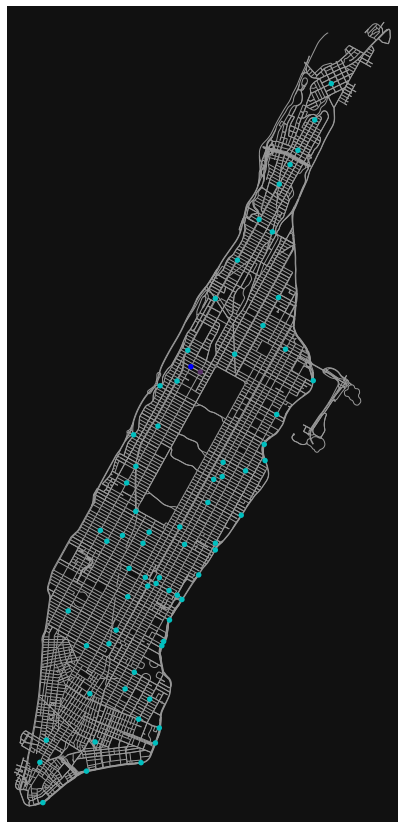

HIER IST RENDER FERTIG
50
Alle: [2]
2
Our destination hub is: 2
action == wait 
2 -> 2 0.0
sum_reward:  0.0
Shared:  []
Book owns:  [42447105, 42437644, 595295501, 42428174, 42443534, 371188750, 371239958, 561042199, 42447132, 42433058, 42450468, 42440743, 1825841704, 42433066, 42445867, 42445357, 42430253, 42428980, 42457401, 42427968, 595352904, 42445392, 42432856, 42445916, 42440798, 561035358, 42435684, 5779545445, 42450025, 42446959, 42427769, 42432889, 42430333, 42446977, 42450820, 42449029, 42436486, 42433422, 1919595922, 4145735059, 42430361, 42443674, 42438809, 7490266268, 370924957, 42429342, 370888100, 42430375, 42444457, 42453934, 42442415, 42442937, 205024444, 42428863, 595314119, 1061531596, 42427863, 42432985, 42445018, 42424025, 3579432156, 370913758, 42423774, 3099327970, 9177424868, 248708582, 3099327976, 42442475, 596775930, 1692433919]


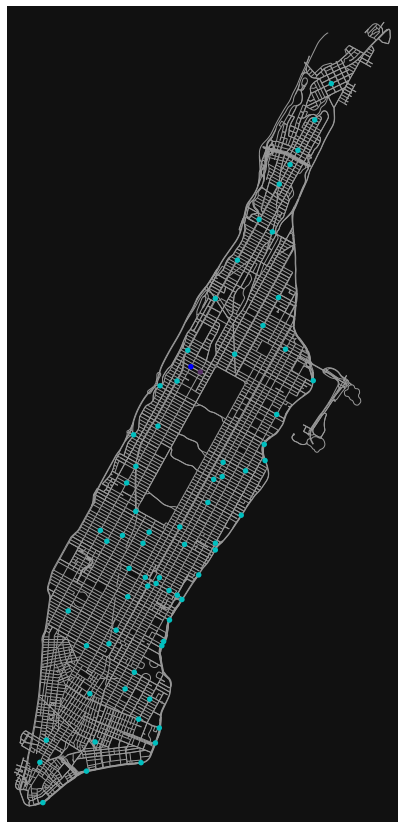

HIER IST RENDER FERTIG
50
Alle: [2]
2
Our destination hub is: 2
action == wait 
2 -> 2 0.0
sum_reward:  0.0
Shared:  []
Book owns:  [42447105, 42437644, 595295501, 42428174, 42443534, 371188750, 371239958, 561042199, 42447132, 42433058, 42450468, 42440743, 1825841704, 42433066, 42445867, 42445357, 42430253, 42428980, 42457401, 42427968, 595352904, 42445392, 42432856, 42445916, 42440798, 561035358, 42435684, 5779545445, 42450025, 42446959, 42427769, 42432889, 42430333, 42446977, 42450820, 42449029, 42436486, 42433422, 1919595922, 4145735059, 42430361, 42443674, 42438809, 7490266268, 370924957, 42429342, 370888100, 42430375, 42444457, 42453934, 42442415, 42442937, 205024444, 42428863, 595314119, 1061531596, 42427863, 42432985, 42445018, 42424025, 3579432156, 370913758, 42423774, 3099327970, 9177424868, 248708582, 3099327976, 42442475, 596775930, 1692433919]


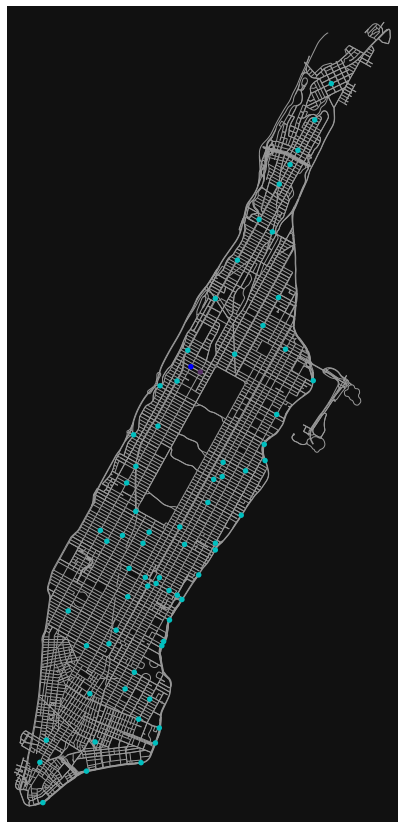

HIER IST RENDER FERTIG
50
Alle: [2]
2
Our destination hub is: 2
action == wait 
2 -> 2 0.0
sum_reward:  0.0
Shared:  []
Book owns:  [42447105, 42437644, 595295501, 42428174, 42443534, 371188750, 371239958, 561042199, 42447132, 42433058, 42450468, 42440743, 1825841704, 42433066, 42445867, 42445357, 42430253, 42428980, 42457401, 42427968, 595352904, 42445392, 42432856, 42445916, 42440798, 561035358, 42435684, 5779545445, 42450025, 42446959, 42427769, 42432889, 42430333, 42446977, 42450820, 42449029, 42436486, 42433422, 1919595922, 4145735059, 42430361, 42443674, 42438809, 7490266268, 370924957, 42429342, 370888100, 42430375, 42444457, 42453934, 42442415, 42442937, 205024444, 42428863, 595314119, 1061531596, 42427863, 42432985, 42445018, 42424025, 3579432156, 370913758, 42423774, 3099327970, 9177424868, 248708582, 3099327976, 42442475, 596775930, 1692433919]


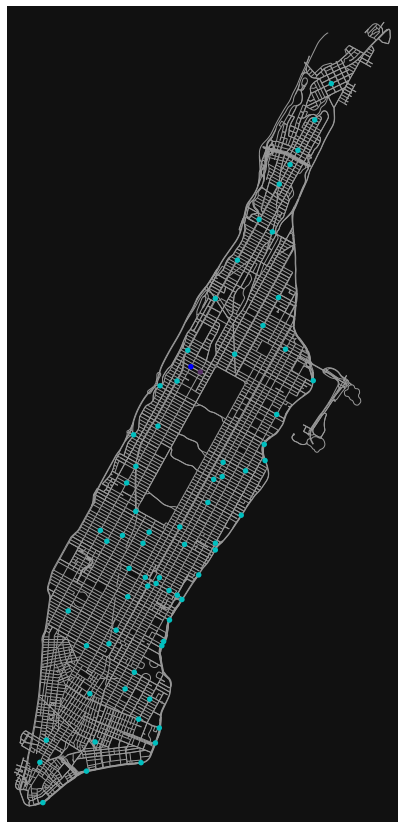

HIER IST RENDER FERTIG
50
Alle: [2]
2
Our destination hub is: 2
action == wait 
2 -> 2 0.0
sum_reward:  0.0
Shared:  []
Book owns:  [42447105, 42437644, 595295501, 42428174, 42443534, 371188750, 371239958, 561042199, 42447132, 42433058, 42450468, 42440743, 1825841704, 42433066, 42445867, 42445357, 42430253, 42428980, 42457401, 42427968, 595352904, 42445392, 42432856, 42445916, 42440798, 561035358, 42435684, 5779545445, 42450025, 42446959, 42427769, 42432889, 42430333, 42446977, 42450820, 42449029, 42436486, 42433422, 1919595922, 4145735059, 42430361, 42443674, 42438809, 7490266268, 370924957, 42429342, 370888100, 42430375, 42444457, 42453934, 42442415, 42442937, 205024444, 42428863, 595314119, 1061531596, 42427863, 42432985, 42445018, 42424025, 3579432156, 370913758, 42423774, 3099327970, 9177424868, 248708582, 3099327976, 42442475, 596775930, 1692433919]


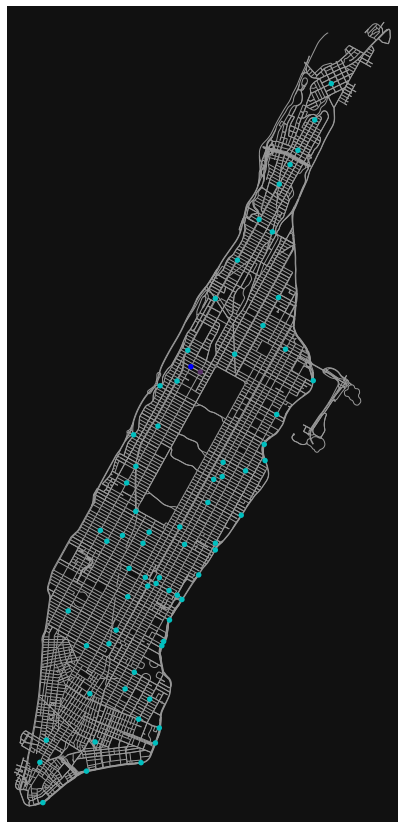

HIER IST RENDER FERTIG
50
Alle: [2]
2
Our destination hub is: 2
action == wait 
2 -> 2 0.0
sum_reward:  0.0
Shared:  []
Book owns:  [42447105, 42437644, 595295501, 42428174, 42443534, 371188750, 371239958, 561042199, 42447132, 42433058, 42450468, 42440743, 1825841704, 42433066, 42445867, 42445357, 42430253, 42428980, 42457401, 42427968, 595352904, 42445392, 42432856, 42445916, 42440798, 561035358, 42435684, 5779545445, 42450025, 42446959, 42427769, 42432889, 42430333, 42446977, 42450820, 42449029, 42436486, 42433422, 1919595922, 4145735059, 42430361, 42443674, 42438809, 7490266268, 370924957, 42429342, 370888100, 42430375, 42444457, 42453934, 42442415, 42442937, 205024444, 42428863, 595314119, 1061531596, 42427863, 42432985, 42445018, 42424025, 3579432156, 370913758, 42423774, 3099327970, 9177424868, 248708582, 3099327976, 42442475, 596775930, 1692433919]


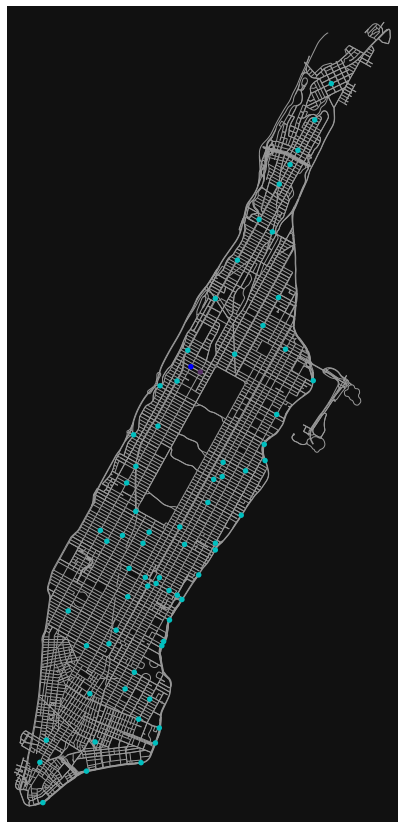

HIER IST RENDER FERTIG
50
Alle: [2]
2
Our destination hub is: 2
action == wait 
2 -> 2 0.0
sum_reward:  0.0
Shared:  []
Book owns:  [42447105, 42437644, 595295501, 42428174, 42443534, 371188750, 371239958, 561042199, 42447132, 42433058, 42450468, 42440743, 1825841704, 42433066, 42445867, 42445357, 42430253, 42428980, 42457401, 42427968, 595352904, 42445392, 42432856, 42445916, 42440798, 561035358, 42435684, 5779545445, 42450025, 42446959, 42427769, 42432889, 42430333, 42446977, 42450820, 42449029, 42436486, 42433422, 1919595922, 4145735059, 42430361, 42443674, 42438809, 7490266268, 370924957, 42429342, 370888100, 42430375, 42444457, 42453934, 42442415, 42442937, 205024444, 42428863, 595314119, 1061531596, 42427863, 42432985, 42445018, 42424025, 3579432156, 370913758, 42423774, 3099327970, 9177424868, 248708582, 3099327976, 42442475, 596775930, 1692433919]


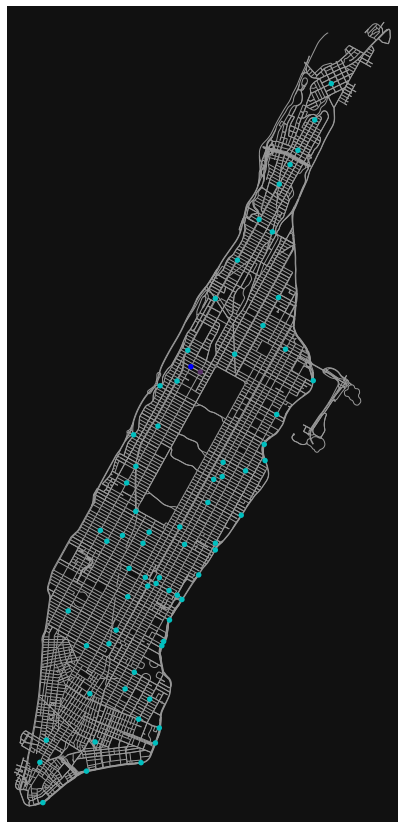

HIER IST RENDER FERTIG
50
Alle: [2]
2
Our destination hub is: 2
action == wait 
2 -> 2 0.0
sum_reward:  0.0
0.0


In [8]:
def run_one_episode (env):
    env.reset()
    print("reset done")
    sum_reward = 0
    counter = 0
    while(counter<10):
        # visualize current situation
        env.render()

        # look in adjacency matrix for costs from the current position
        array = env.learn_graph.adjacency_matrix('cost')[env.position].astype(int)
        min = np.amin(array)
        array = np.where(array==min,50,array)

        # get minimal value in array
        #while(action==env.position):
        min_value = np.amin(array)
        print(min_value)
        # if multiple entries have the same value
        all_indices = np.where(array==min_value)
        print(f"Alle: {all_indices[0]}")
        action = np.random.choice(all_indices[0])
        print(action)
        # select random of all_indices
            #while(action==env.position):
            #    action = np.random.choice(all_indices[0])

        # select action and show it
        #action = env.action_space[dest_hub]
        print(f"Our destination hub is: {action}")
        state, reward, done, info = env.step(action)

        # add reward
        sum_reward+=reward
        counter+=1

        if done:
            print("DELIVERY DONE! sum_reward: ",sum_reward)
            break

        print("sum_reward: ",sum_reward)
        # print("sum_reward: ",sum_reward, " time: ",env.time, "deadline time: ", env.deadline, "pickup time: ", env.pickup_time)
    return sum_reward
print(run_one_episode(env))